In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# 随即森林调参实战

In [2]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.data.shape

(569, 30)

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
score_pre = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score_pre

0.9648809523809524

探索n_estimators的最好区间

In [12]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)

0.9666353383458647 81


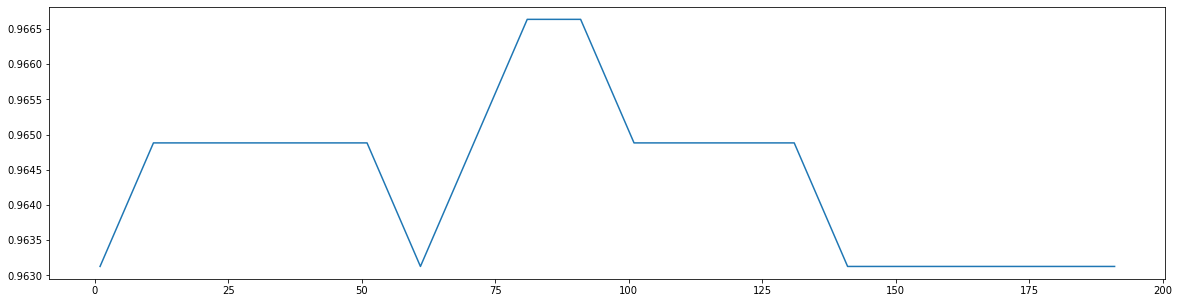

In [16]:
print(max(scorel), (scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

更细化的探索

0.9666353383458647 73


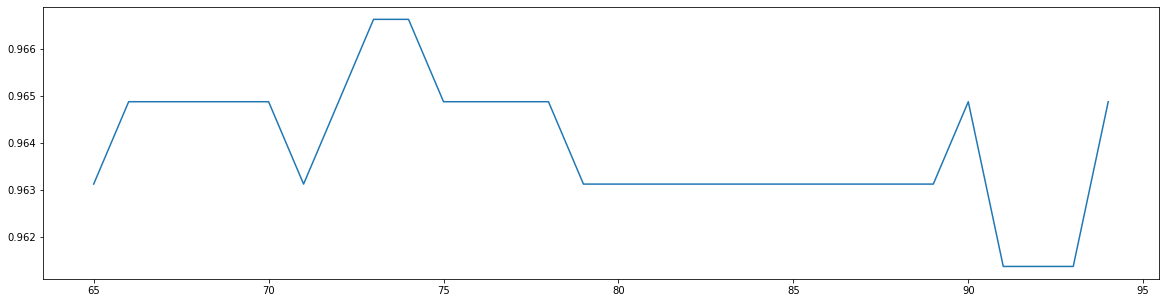

In [19]:
scorel = []
for i in range(65,95):
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)
print(max(scorel), ([*range(65,95)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,95),scorel)
plt.show()

# 网格搜索进行调参

## 首先调整max_depth

In [20]:
param_grid = {'max_depth':np.arange(1,20,1)}

rfc = RandomForestClassifier(n_estimators=73,
                            random_state=90)
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [21]:
GS.best_params_

{'max_depth': 8}

In [23]:
GS.best_score_

0.9666353383458647

调整maxdepth，模型没有上升的空间，基本上已经保持在泛化误差的最低点或者稍微偏左，现在将泛化误差向右推看模型效果是否会更好。

## 调整max_features

In [25]:
param_grid = {'max_features':np.arange(5,30,1)}

rfc = RandomForestClassifier(n_estimators=73,
                             max_depth=8,
                            random_state=90)
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=73,
                                              random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [26]:
GS.best_params_

{'max_features': 22}

In [27]:
GS.best_score_

0.968421052631579

模型效果又有一个提升，现在模型已经基本在最低点了。

最终的参数结果

In [28]:
rfc = RandomForestClassifier(n_estimators=73,
                            max_depth=8,
                            max_features=22,
                            random_state=90)
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score

0.968421052631579

# AdaBoostClassifier调参

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
abc = AdaBoostClassifier(n_estimators=50, random_state=90)
score_pre = cross_val_score(abc, data.data, data.target, cv=10).mean()
score_pre

0.963095238095238

In [32]:
scorel = []
for i in range(0,200,10):
    rfc = AdaBoostClassifier(n_estimators=i+1,
                                random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)

0.9736215538847117 181


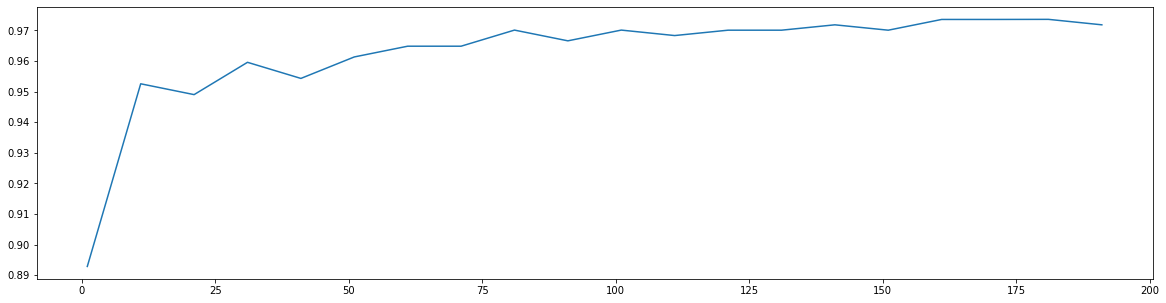

In [33]:
print(max(scorel), (scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9753759398496239 175


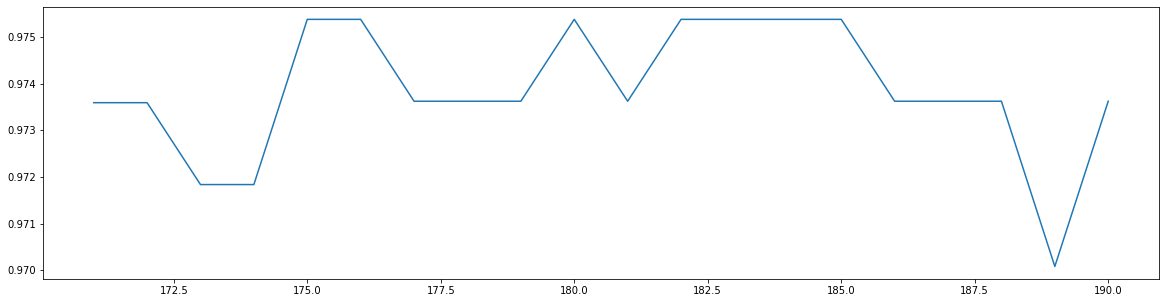

In [34]:
scorel = []
for i in range(171,191):
    rfc = AdaBoostClassifier(n_estimators=i,
                                random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)
print(max(scorel), ([*range(171,191)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(171,191),scorel)
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth=2)
abc = AdaBoostClassifier(n_estimators=175,
                        base_estimator=dc,
                        random_state=90)
score = cross_val_score(abc, data.data, data.target, cv=10).mean()
score

0.9736528822055138

max_depth设置为2可以看见模型效果反倒下降一些

In [40]:
param_grid = {'learning_rate':np.arange(1,10,1),
              'n_estimators':np.arange(171,191)
             }

rfc = AdaBoostClassifier(random_state=90)
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=90),
             param_grid={'learning_rate': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190])})

In [41]:
GS.best_params_

{'learning_rate': 1, 'n_estimators': 175}

In [42]:
GS.best_score_

0.9753759398496239